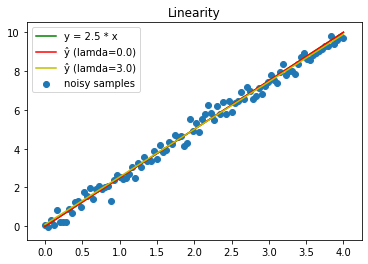

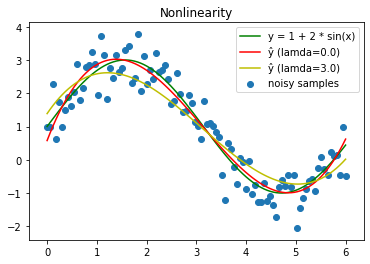

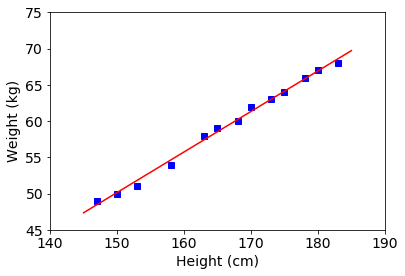

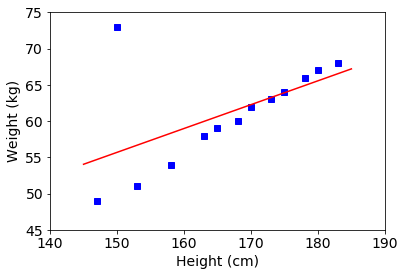

In [25]:
import numpy as np
import matplotlib.pyplot as plt

"""
Linear regression by closed form
"""
class Regression(object):
    def fit(self, X, y, lamda=0):
        G = lamda * np.eye(X.shape[1])
        self.params = np.dot(np.linalg.pinv(np.dot(X.T, X) + G), np.dot(X.T, y))

    def predict(self, X):
        return np.dot(X, self.params)


if __name__ == '__main__':
    # Create synthetic data for linearity
    x = np.linspace(0, 4, 100)
    y = 2.5 * x
    y_noise = y + .3 * np.random.normal(size=len(x))

    # Plot synthetic data
    plt.plot(x, y, 'g', label='y = 2.5 * x')
    plt.scatter(x, y_noise, label='noisy samples')

    # Create feature matrix (linearity)
    X = np.array([x]).T
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)

    # Plot regressions
    r = Regression()
    
    r.fit(X, y)
    plt.plot(x, r.predict(X), 'r', label=u'ŷ (lamda=0.0)')
    
    lamda = 3.0
    r.fit(X, y, alpha)
    plt.plot(x, r.predict(X), 'y', label=u'ŷ (lamda=%.1f)' % lamda)

    plt.title('Linearity')
    plt.legend()
    plt.show()
    
    #-------------------------------------------------------------
    
    # Create synthetic data for nonlinearity
    x = np.linspace(0, 6, 100)
    y = 1 + 2 * np.sin(x)
    y_noise = y + .5 * np.random.normal(size=len(x))

    # Plot synthetic data
    plt.plot(x, y, 'g', label='y = 1 + 2 * sin(x)')
    plt.scatter(x, y_noise, label='noisy samples')

    # Create feature matrix (nonlinearity)
    X = np.array([x]).T
    X = np.concatenate((X, np.power(X, 2), np.power(X, 3)), axis=1)
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)

    # Plot regressions
    r = Regression()
    
    r.fit(X, y)
    plt.plot(x, r.predict(X), 'r', label=u'ŷ (lamda=0.0)')
    
    lamda = 3.0
    r.fit(X, y, alpha)
    plt.plot(x, r.predict(X), 'y', label=u'ŷ (lamda=%.1f)' % lamda)
    
    plt.title('Nonlinearity')
    plt.legend()
    plt.show()
    
    #---------------------------------------------------------------
    # height (cm)
    x = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
    # weight (kg)
    y = np.array([49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])
    
    # Create feature matrix (linearity)
    X = np.array([x]).T
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)

    # Plot regressions
    r = Regression()
    
    r.fit(X, y)
    w = r.params
    
    # weights
    w_0 = w[0]
    w_1 = w[1]

    x0 = np.linspace(145, 185)
    y0 = w_0 + w_1*x0

    # Drawing
    plt.plot(X, y, 'bs')
    plt.plot(x0, y0, 'r-') # the fitting line
    plt.axis([140, 190, 45, 75]) # xmin, xmax, ymin, ymax 
    plt.xlabel('Height (cm)', fontsize = 14)
    plt.ylabel('Weight (kg)', fontsize = 14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()
    
    #---------------------------------------------------------------
    # height (cm)
    x = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
    # weight (kg)
    y = np.array([49, 73, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])
    
    # Create feature matrix (linearity)
    X = np.array([x]).T
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)

    # Plot regressions
    r = Regression()
    
    r.fit(X, y)
    w = r.params
    
    # weights
    w_0 = w[0]
    w_1 = w[1]

    x0 = np.linspace(145, 185)
    y0 = w_0 + w_1*x0

    # Drawing
    plt.plot(X, y, 'bs')
    plt.plot(x0, y0, 'r-') # the fitting line
    plt.axis([140, 190, 45, 75]) # xmin, xmax, ymin, ymax 
    plt.xlabel('Height (cm)', fontsize = 14)
    plt.ylabel('Weight (kg)', fontsize = 14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()